# ``Visualisierung``

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   
import datetime


In [2]:
%run Preparation_Vis.ipynb

[0 1]
Alle Daten: 20560
Testdaten: 4317
Trainingsdaten: 16243


C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\3403862666.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ZeitTag"] = dateInts
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\3403862666.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ZeitTag"] = pd.to_datetime(df2["ZeitTag"])
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\3403862666.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.d

### Daten plotten

Text(0, 0.5, 'CO2')

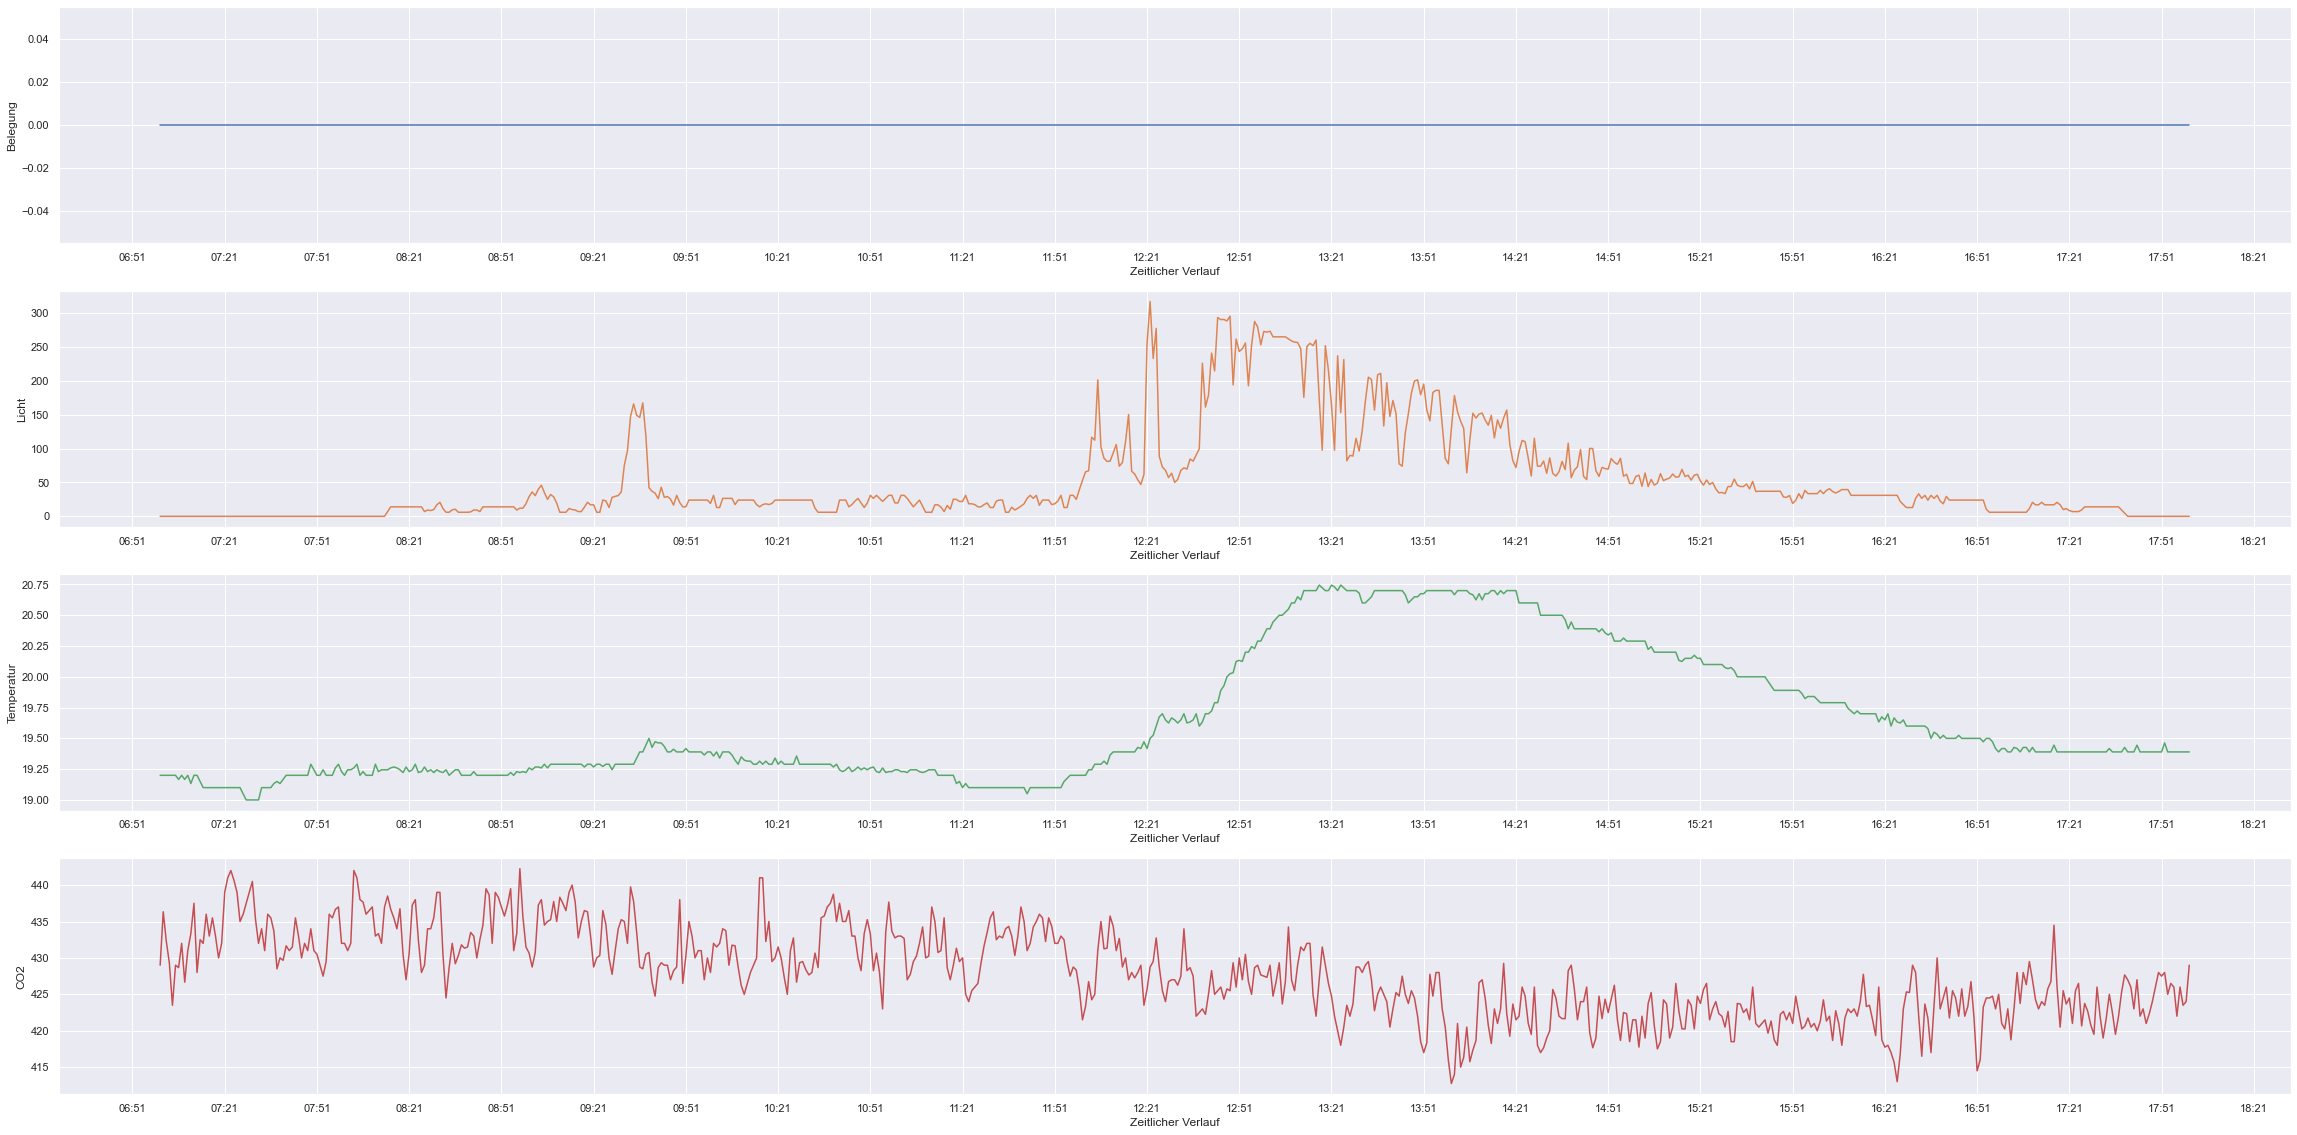

In [3]:
# Größe des Bildes
plt.rcParams['figure.figsize'] = [40, 20]

import matplotlib.dates as mdates
import itertools
# set palette 
palette = itertools.cycle(sns.color_palette())

fig, axs = plt.subplots(nrows=4)


c = next(palette)
sns.lineplot(x="ZeitTag", y="Belegt Ja/Nein",  data=df2, ax=axs[0], color=c)
# Angabe der Intervalle, wie geplottet werden soll
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_locator(mdates.MinuteLocator(interval=30))

# Formattiert die Zeit in Stunden und Minuten
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[0].set_xlabel("Zeitlicher Verlauf")
axs[0].set_ylabel("Belegung")


c = next(palette)
sns.lineplot(x="ZeitTag", y="Licht",  data=df2, ax=axs[1],color=c)
axs[1].xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].set_xlabel("Zeitlicher Verlauf")
axs[1].set_ylabel("Licht")


c = next(palette)
sns.lineplot(x="ZeitTag", y="Temperatur",  data=df2, ax=axs[2],color=c)
axs[2].xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[2].set_xlabel("Zeitlicher Verlauf")
axs[2].set_ylabel("Temperatur")


c = next(palette)
sns.lineplot(x="ZeitTag", y="CO2",  data=df2, ax=axs[3],color=c)
axs[3].xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[3].set_xlabel("Zeitlicher Verlauf")
axs[3].set_ylabel("CO2")

# axs.plot()

## Daten vorbereiten
- Visualisieren von zwei Sonntagen und einem Dienstag (Licht)

# Mehrere Tage in einem Plot

C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\373408820.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,1000,100), fontsize=20)  # horizontal colorbar
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\373408820.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(listHours, fontsize=25)
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\373408820.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,1000,100), fontsize=20)  # horizontal colorbar
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\373408820.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(listHours, fontsize=25)
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\373408820.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,1000,100), f

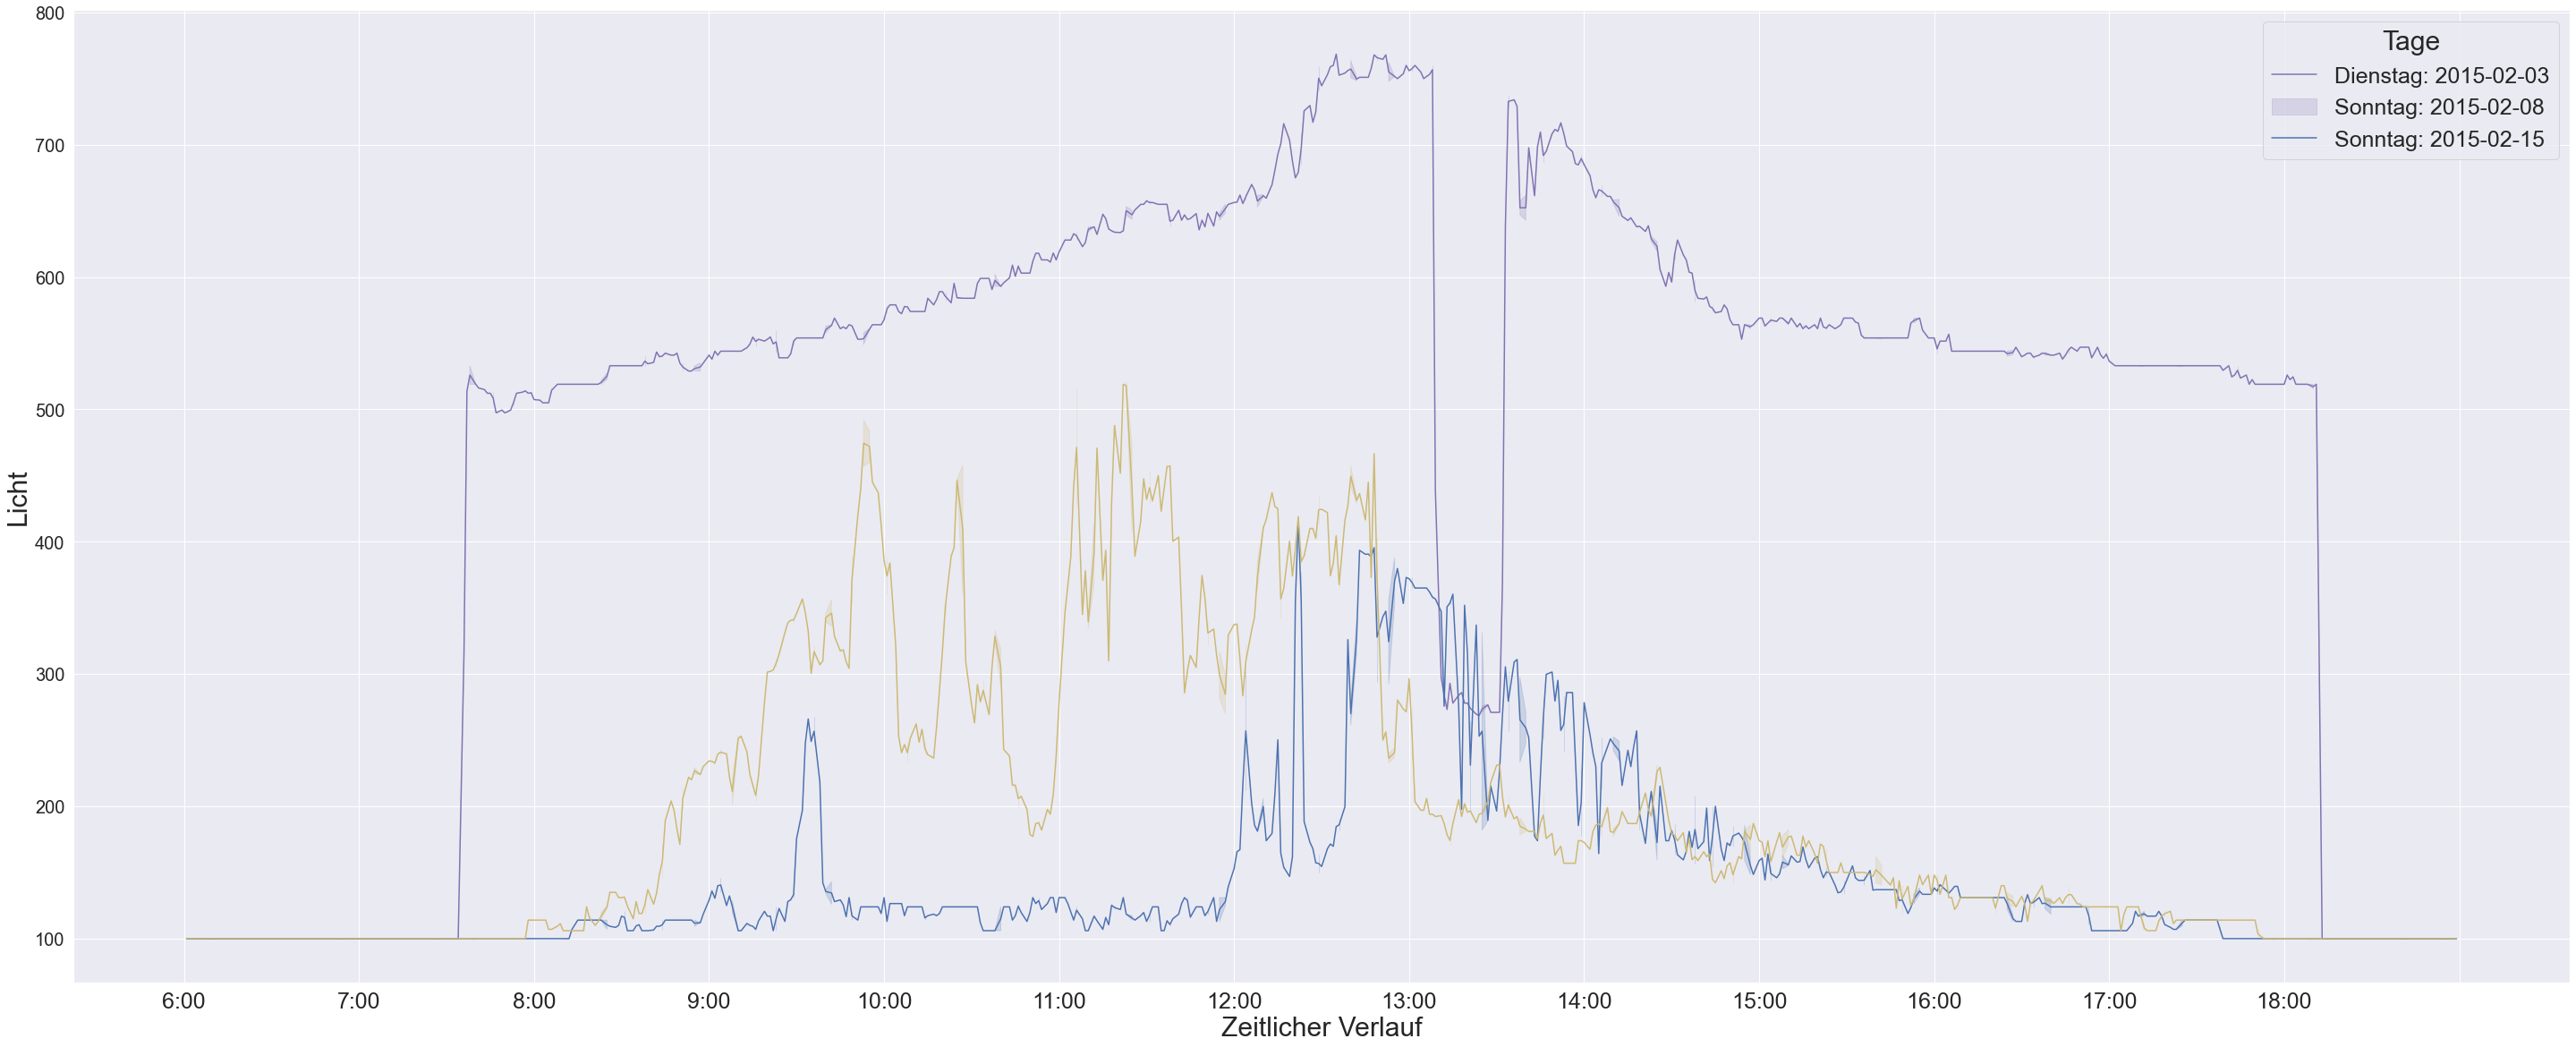

In [8]:
### Funktioniert, zeigt die Temperaturunterschiede
# Größe des Bildes
plt.rcParams['figure.figsize'] = [40, 20]

import matplotlib.dates as mdates
import itertools
# set palette 
palette = itertools.cycle(sns.color_palette())
c = next(palette)


def plotFigures():
    # Größe des Bildes
    plt.rcParams['figure.figsize'] = [50, 20]

    labelsList =[]

    for val in range(0,20):
        # Einfügen um mehrere Tage zu sehen
        c = next(palette)
        # dayC += 1
        
        if val < 9:
            df2 = df_test.loc[(df_test['Datum'] > f'2015-02-0{str(val)} 06:00:00') & (df_test['Datum'] <= f'2015-02-0{str(val)} 18:59:59')]
        else:
            df2 = df_test.loc[(df_test['Datum'] > f'2015-02-{str(val)} 06:00:00') & (df_test['Datum'] <= f'2015-02-{str(val)} 18:59:59')]

        df2["Datum"] = pd.to_datetime(df2["Datum"]).dt.time

        dateInts = []
        for i in df2["Datum"].values:
            dateInts.append(i.strftime("%H:%M"))
        df2["ZeitTag"] = dateInts
        df2["ZeitTag"] = pd.to_datetime(df2["ZeitTag"])




        ax = sns.lineplot(x="ZeitTag", y="Licht",  data=df2, color=c)
        #
        if len(df2) > 10 and val < 10:
            if val == 3:
                labelsList.append(f"Dienstag: 2015-02-0{str(val)}")
                c = next(palette)
            elif val == 8:
                labelsList.append(f"Sonntag: 2015-02-0{str(val)}")
                c = next(palette)
        elif len(df2) > 10 and val > 10:
            labelsList.append(f"Sonntag: 2015-02-{str(val)}")
            c = next(palette)
        ax.legend(title="Tage", labels=labelsList, fontsize=25, title_fontsize=30)

        # Angabe der Intervalle, wie geplottet werden soll
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
        # ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))

        # Formattiert die Zeit in Stunden und Minuten
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

        ax.set_yticklabels(np.arange(0,1000,100), fontsize=20)  # horizontal colorbar
        
        listHours = [str(val)+":00" for val in range(6,19)]
        ax.set_xticklabels(listHours, fontsize=25)


        ax.set_xlabel("Zeitlicher Verlauf", fontsize = 30)
        ax.set_ylabel("Licht", fontsize = 30)
        # ax.plot()
    



plotFigures()

### Funktioniert, zeigt die Temperaturunterschiede

C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\1870745312.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop("Datum", 1)
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\1870745312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Datum"] = pd.to_datetime(df2["Datum"]).dt.time
C:\Users\Jörg\AppData\Local\Temp\ipykernel_23080\1870745312.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Z

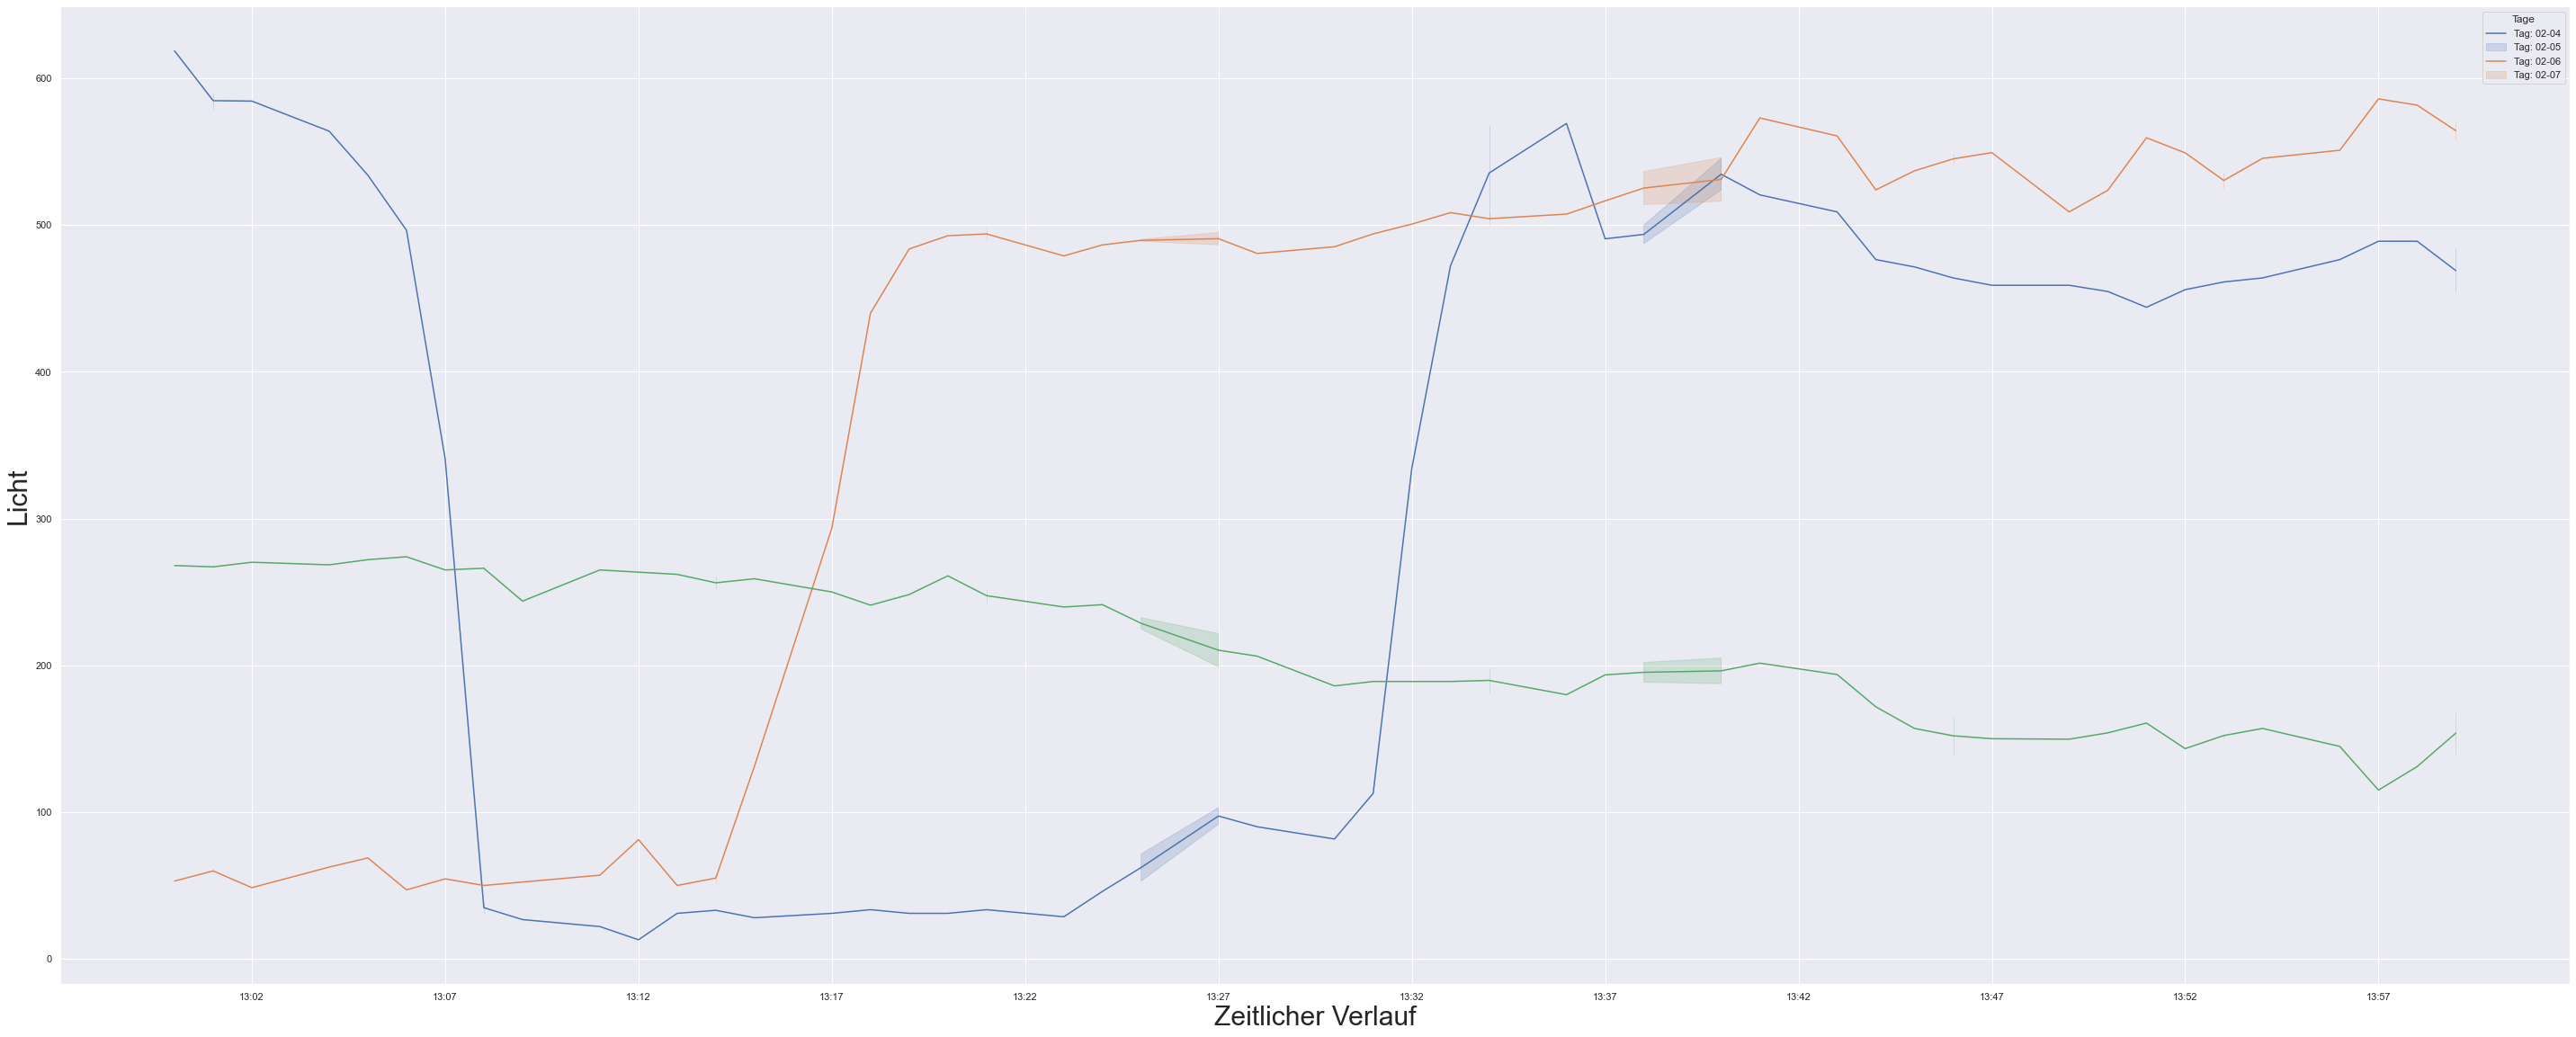

In [5]:


def plotFigures():
    # Größe des Bildes
    plt.rcParams['figure.figsize'] = [50, 20]

    dayC = 3
    labelsList =[]

    for val in range(0,4):
        # Einfügen um mehrere Tage zu sehen

        dayC += 1
 
        df2 = df.loc[(df['Datum'] >= f'2015-02-0{str(dayC)} 13:00:00') & (df['Datum'] <= f'2015-02-0{str(dayC)} 14:00:00')]

        df2["Datum"] = pd.to_datetime(df2["Datum"]).dt.time

        dateInts = []
        for i in df2["Datum"].values:
            dateInts.append(i.strftime("%H:%M"))
        df2["ZeitTag"] = dateInts
        df2["ZeitTag"] = pd.to_datetime(df2["ZeitTag"])
        df2 = df2.drop("Datum", 1)

        c = next(palette)
        ax = sns.lineplot(x="ZeitTag", y="Licht",  data=df2)

        #
        labelsList.append(f"Tag: 02-0{str(dayC)}")
        plt.legend(title="Tage", labels=labelsList)
        # Angabe der Intervalle, wie geplottet werden soll
        # ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
        ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))

        # Formattiert die Zeit in Stunden und Minuten
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.set_xlabel("Zeitlicher Verlauf", fontsize = 30)
        ax.set_ylabel("Licht", fontsize = 30)
        # ax.plot()
    



plotFigures()